## **Venta de seguros de auto con Machine Learning**

**Naren Castellon**

**4 de Mayo 2021**

<img src="imagen/seguro_auto.jpg" width="500" height="250">

<font size=3.5 > <p style="color:purple">
    Usaremos los siguientes modelos Machine Learning para clasificación 

1. Regresión Logistica
2. KNN
3. Support Vector Machine
4. Árbol de decisión

<font size=5 > <p style="color:purple"> 1. **Importamos las librerias**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, precision_score, recall_score

<font size=5 > <p style="color:purple">**2. Importamos los Datos**

Este es un conjunto de datos IBM Watson Analytics. Este conjunto de datos nos brinda información sobre sus clientes. Puede predecir su comportamiento para retener a sus clientes. Además podemos analizar todos los datos relevantes de los clientes y desarrollar programas en la que podamos buscar retener la mayor cantidad de clientes, de manera que también podamos ir comprendiento la demografía de los clientes y su comportamiento de compra.

Vamos a utilizar análisis predictivo para analizar los clientes más importante y rentables y como estos interactúan. Realizaremos acciones específicas para aumentar la respuesta, la retención y el crecimiento rentable de los clientes

In [ ]:
data = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [ ]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<font size=5 > <p style="color:purple"> **3. Exploratory Data Analysis (EDA)**

In [ ]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
data.shape

(9134, 24)

In [ ]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [ ]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Nuestro conjunto de datos tiene 9134 clientes con información sobres sus ingresos, educación, sexo, residencia, etc (income, education, gender,residence). Cada cliente posee un autómovil y se le ofrece 4 tipos difentes de seguros de automovil. El target de esa base de datos es la variable **Response**. La respuesta (Response) puede ser "Si"- el cliente acepta la oferta, y "No" el cliente no acepta la oferta.

Podemos verificar si tenemos valores pérdidos

In [ ]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

<font size='3' font>Tenemos 0 valores perdidos, lo cual es muy bueno.
Ahora hagamos EDA con algunos gráficos geniales :) Primero veremos cómo se distribuyen los cargos de acuerdo con factores dados

In [ ]:
import warnings
warnings.filterwarnings('ignore')

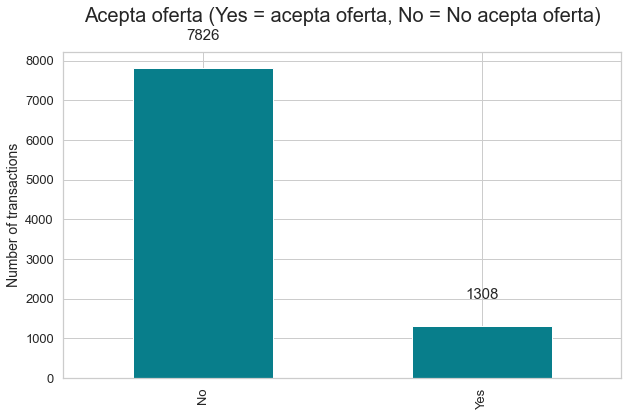

In [ ]:
ax = data['Response'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Acepta oferta (Yes = acepta oferta, No = No acepta oferta)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

Vamos a visualizar que tipo de relación se tiene con los estado o la region al momento de poder 

<AxesSubplot:xlabel='Response', ylabel='count'>

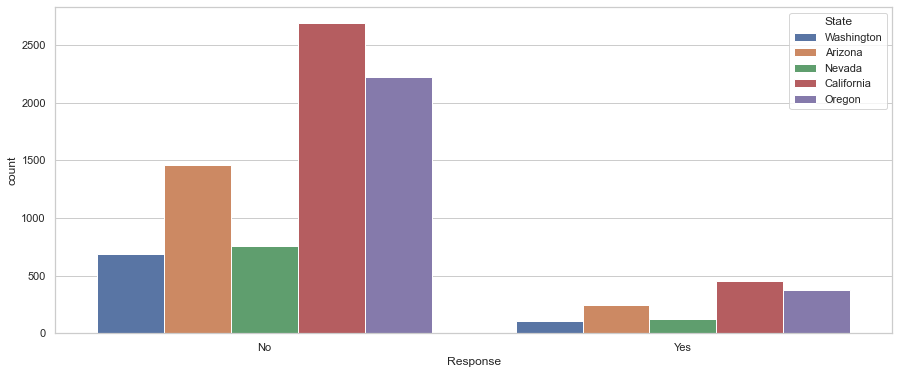

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.countplot("Response", hue="State", data = data)

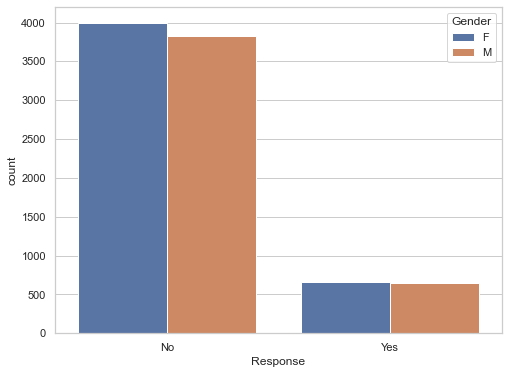

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot("Response", hue="Gender", data = data);

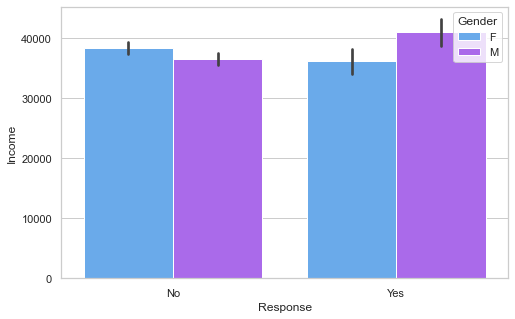

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax = sns.barplot(x='Response', y='Income', hue='Gender', data=data, palette='cool')

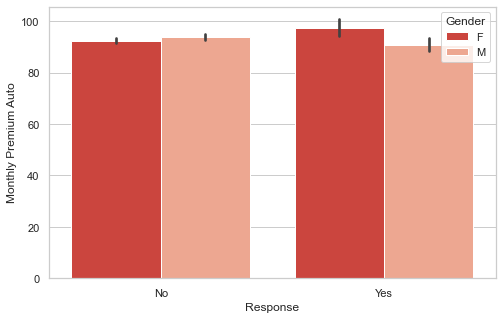

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax = sns.barplot(x='Response', y='Monthly Premium Auto', hue='Gender', data=data, palette='Reds_r')

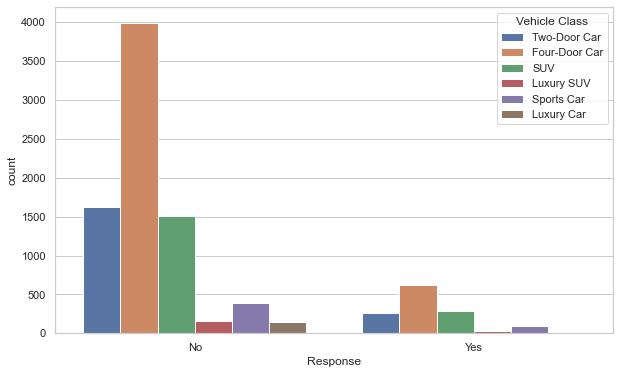

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot("Response", hue="Vehicle Class", data = data);


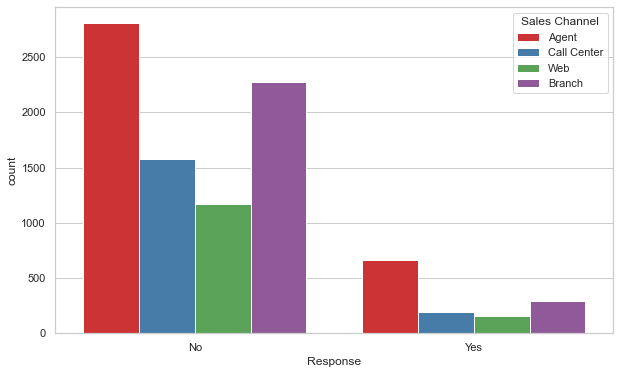

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot("Response", hue="Sales Channel", data = data,palette='Set1');


In [ ]:
data.Response.value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

sólo  1308 de los clientes han aceptado la oferta.

In [ ]:
print("Only",round((len(data[(data.Response == "Yes")])/len(data.Response)*100),2),"%","of our customer accept an offer made by your Sales Team.")

Only 14.32 % of our customer accept an offer made by your Sales Team.


In [ ]:
data.groupby("Sales Channel").agg({"Response":"count"})

,Response
Sales Channel,
Agent,3477
Branch,2567
Call Center,1765
Web,1325


La mayoría de las ofertas fueron realizadas por agentes (3477 ofertas) y la que tuvo menos oferta fue a través del sitio web.

In [ ]:
channel = list(data["Sales Channel"].unique())
for i in channel:
    output = len(data[(data["Sales Channel"] == i) & 
                      (data["Response"] == "Yes")]) /len(data[(data["Sales Channel"] == i)])
    print(round((output * 100),2), "% of offers via the Sales Channel", i, "were accepted.")

19.15 % of offers via the Sales Channel Agent were accepted.
10.88 % of offers via the Sales Channel Call Center were accepted.
11.77 % of offers via the Sales Channel Web were accepted.
11.45 % of offers via the Sales Channel Branch were accepted.


In [ ]:
objects = ["State","Response","Coverage","Education","EmploymentStatus",
           "Gender","Location Code","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel",
           "Vehicle Class","Vehicle Size"]

for obj in objects:
    print(data[obj].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
F    4658
M    4476
Name: Gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


**Results**

Todas las características categoricas están bien distribuidas, así que las guardare  y las codificaremos en datos numéricos

Algunas variables que tenemos en nuestro conjunto de datos no son tan importantes, por ejemplo el customer, policy es la misma que policy type, la fecha tampoco es importante, así que procederemos a eliminarlas


Los datos no están equilibrados con respecto a la variable respuesta.

<font size=5 > <p style="color:purple"> **4. Data Analysis**

In [ ]:
data = data.drop(columns={"Customer","Policy", "Effective To Date"})

In [ ]:
# Creamos una lista de las variables categoricas

data_categorial = data.select_dtypes(include=["object"])
categories = list(data_categorial.columns)
categories

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [ ]:
# Convertimos las variables categoricas en numéricas empleando LabelEncoder
lb = LabelEncoder()

for i in categories:
    data[i] = lb.fit_transform(data[i])


In [ ]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,32,5,0,1,0,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,13,42,0,8,1,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,18,38,0,2,1,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,18,65,0,7,0,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,12,44,0,1,1,0,0,138.130879,0,1


Creamos la matriz de correlación

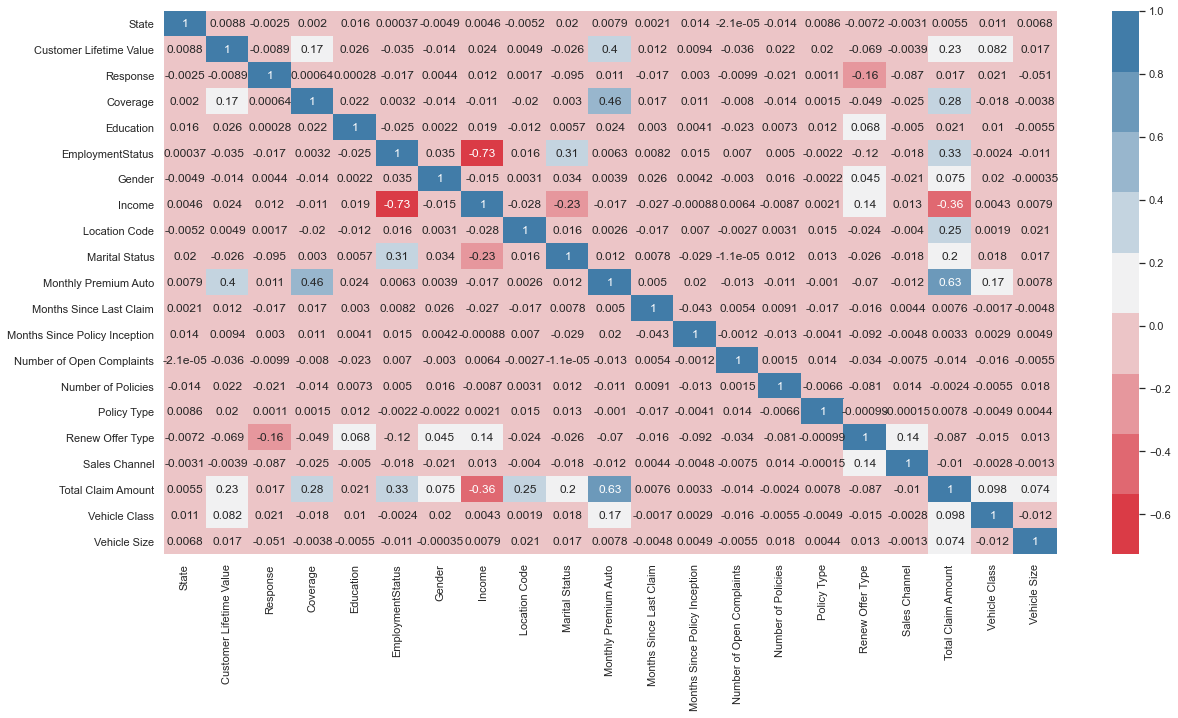

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
cmap = sns.diverging_palette(10, 240, n=9)
ax = sns.heatmap(data.corr(), annot=True, cmap=cmap)

<font size=5 > <p style="color:purple"> **5. Supervised Machine Learning para datos no balanceados**

Empezaremos con la predicción de la respuesta de los futuros clientes. Para esto debemos encontrar un modelo adecuado. Dados que nuestros datos tiene un objetivo que se separa en **Si** y **No**, podemos usar la clasificación de los modelos aprendizaje automático (Machine Learning), iniciaremos usando los siguientes modelos:

* Logistic Regression
* KNeighbours Classifier
* Support Vector Machine
* Decision Tree

In [ ]:
y = data["Response"]

In [ ]:
X = data.drop(["Response"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

## **1. Regresión Logistica**

In [ ]:
lr = LogisticRegression()
# initialize the model (=lr)

model_logistica=lr.fit(X_train,y_train)
#fit the model to the train set

#prediccion del modelo
y_pred = model_logistica.predict(X_test)

acc = lr.score(X_test,y_test)*100
# comapring the test with the data

print("Logistic Regression Test Accuracy", round(acc, 2),"%")

Logistic Regression Test Accuracy 84.95 %


## **Resultado**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (accuracy_score(y_test, y_pred))

[[1552    0]
 [ 275    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1552
           1       0.00      0.00      0.00       275

    accuracy                           0.85      1827
   macro avg       0.42      0.50      0.46      1827
weighted avg       0.72      0.85      0.78      1827

0.849480021893815


## **2. Modelo K Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
# prediction = knn.predict(x_test)

y_pred_knn = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print("2 neighbors KNN Score: ",round(acc,2),"%")

2 neighbors KNN Score:  96.93 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred_knn))
print (classification_report(y_test,y_pred_knn))
print (accuracy_score(y_test, y_pred_knn))

[[1501   51]
 [   5  270]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1552
           1       0.84      0.98      0.91       275

    accuracy                           0.97      1827
   macro avg       0.92      0.97      0.94      1827
weighted avg       0.97      0.97      0.97      1827

0.9693486590038314


## **3 Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svc=svm.predict(X_test)
acc = svm.score(X_test,y_test)*100
print("SVM Algorithm Test Accuracy", round(acc, 2),"%")

SVM Algorithm Test Accuracy 84.95 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred_svc))
print (classification_report(y_test,y_pred_svc))
print (accuracy_score(y_test, y_pred_svc))

[[1552    0]
 [ 275    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1552
           1       0.00      0.00      0.00       275

    accuracy                           0.85      1827
   macro avg       0.42      0.50      0.46      1827
weighted avg       0.72      0.85      0.78      1827

0.849480021893815


## **4. Árbol de decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

#predicion
y_pred_dtc = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100
print("Decision Tree Test Accuracy", round(acc, 2),"%")

Decision Tree Test Accuracy 96.61 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred_dtc))
print (classification_report(y_test,y_pred_dtc))
print (accuracy_score(y_test, y_pred_dtc))

[[1490   62]
 [   0  275]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1552
           1       0.82      1.00      0.90       275

    accuracy                           0.97      1827
   macro avg       0.91      0.98      0.94      1827
weighted avg       0.97      0.97      0.97      1827

0.9660645867542419


**Resultados**

Los modelos tienen una precisión realmente alta, el modelo de Support Vector Machine parece ser la mejor decisión para usar con más del 99% de precisión 

Pero esto se debe a que los datos que hemos trabajado hasta el momento no estan balanceados. La variable response tiene como respuesta con "No"  un porcentaje del 86%, por lo que el modelo no es de mucha utilidad y no da una visión muy precisa de los datos.

<font size=5 > <p style="color:purple">**6. Supervised Machine Learning para datos balanceados**

En esta ocasión para tener un mejor resultado de nuestro datos, podemos reducir la muestra de nuestro Target. En manera particular esto podría ser mejor que el sobremuestreo, por lo que no le damos demasiado peso a un objetivo determinado.

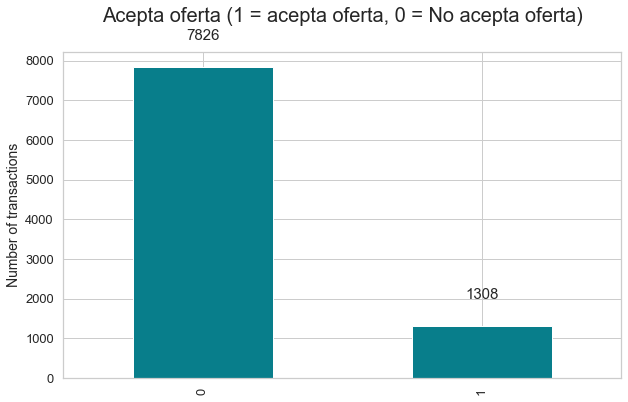

In [ ]:
ax = data['Response'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Acepta oferta (1 = acepta oferta, 0 = No acepta oferta)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [ ]:
#Downsampling:

#1. Test-Train Split!!
# concatenate our training data back together

X_down = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes

no_effect = X_down[X_down.Response==0]
effect = X_down[X_down.Response==1]

# downsample majority

no_effect_downsampled = resample(no_effect,
                               replace = False, # sample without replacement
                               n_samples = len(effect), # match minority n
                               random_state = 27) # reproducible results

# combine minority and downsampled majority

downsampled = pd.concat([no_effect_downsampled, effect])

# checking counts

downsampled.Response.value_counts()

0    1033
1    1033
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

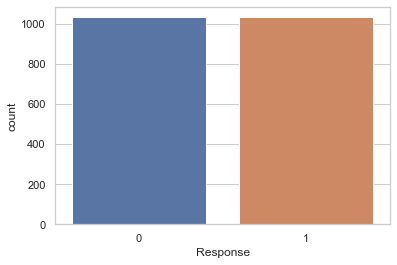

In [ ]:
sns.countplot(downsampled['Response'])

In [ ]:
downsampled.shape

(2066, 21)

In [ ]:
y_train_down = downsampled.Response

In [ ]:
X_train_down = downsampled.drop(["Response"], axis = 1)

## ** REGRESIÓN  LOGISTICA**

In [ ]:
lr = LogisticRegression()
# initialize the model (=lr)

lr.fit(X_train_down,y_train_down)
#fit the model to the train set

y_pred1 = lr.predict(X_test)

acc = lr.score(X_test,y_test)*100
# comapring the test with the data

print("Prediction",y_pred[:5])
print("Logistic Regression Test Accuracy", round(acc, 2),"%")

Prediction [0 0 0 0 0]
Logistic Regression Test Accuracy 51.01 %


La precisión es muy mala, intentemos con otro modelo.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred1))
print (classification_report(y_test,y_pred1))
print (accuracy_score(y_test, y_pred1))

[[793 759]
 [136 139]]
              precision    recall  f1-score   support

           0       0.85      0.51      0.64      1552
           1       0.15      0.51      0.24       275

    accuracy                           0.51      1827
   macro avg       0.50      0.51      0.44      1827
weighted avg       0.75      0.51      0.58      1827

0.5101258894362343


## **K-NEAREST NEIGHBOUR** 

In [ ]:
n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors = n_neighbors)  # n_neighbors means k
knn.fit(X_train_down, y_train_down)

y_pred2 = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100

print("Prediction:", y_pred[:5])
print(n_neighbors,"neighbors KNN Score: ",round(acc,2),"%")

Prediction: [0 0 0 0 0]
2 neighbors KNN Score:  84.84 %


In [ ]:
acc_train = knn.score(X_train, y_train)*100
print("The accuracy score for the training data is: ",round(acc_train,2),"%")
acc_test = knn.score(X_test,y_test)*100
print("The accuracy score for the test data is: ",round(acc_test,2),"%")



The accuracy score for the training data is:  87.0 %
The accuracy score for the test data is:  84.84 %


In [ ]:
cv_results = cross_val_score(knn, X_train_down,y_train_down, cv = 5)
cv_results

array([0.89613527, 0.87681159, 0.85990338, 0.90533981, 0.87864078])

Accuracy is better and also the data is continuous.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred2))
print (classification_report(y_test,y_pred2))
print (accuracy_score(y_test, y_pred2))

[[1280  272]
 [   5  270]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1552
           1       0.50      0.98      0.66       275

    accuracy                           0.85      1827
   macro avg       0.75      0.90      0.78      1827
weighted avg       0.92      0.85      0.87      1827

0.8483853311439519


6.3. **DECISION TREE**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_down, y_train_down)

y_pred_dtc3 = dtc.predict(X_test)

acc_dtc = dtc.score(X_test, y_test)*100

print("Prediction", y_pred_dtc[:5])
print("Decision Tree Test Accuracy", round(acc_dtc, 2),"%")

Prediction [0 0 0 0 0]
Decision Tree Test Accuracy 87.08 %


In [ ]:
acc_train = dtc.score(X_train, y_train)*100
print("The accuracy score for the training data is: ",round(acc_train,2),"%")
acc_test = dtc.score(X_test,y_test)*100
print("The accuracy score for the test data is: ",round(acc_test,2),"%")

The accuracy score for the training data is:  88.7 %
The accuracy score for the test data is:  87.08 %


In [ ]:
cv_results = cross_val_score(dtc, X_train_down,y_train_down, cv = 5)
cv_results

array([0.90821256, 0.91041162, 0.91767554, 0.91525424, 0.90799031])

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_dtc3)
cnf_matrix

array([[1322,  230],
       [   6,  269]], dtype=int64)

In [ ]:
dtc_recall = recall_score(y_test, y_pred_dtc3)
dtc_recall

0.9781818181818182

In [ ]:
271/(271+4)

0.9854545454545455

In [ ]:
dtc_precision = precision_score(y_test,y_pred_dtc3)
dtc_precision

0.5387673956262425

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred_dtc3))
print (classification_report(y_test,y_pred_dtc3))
print (accuracy_score(y_test, y_pred_dtc3))

[[1322  230]
 [   6  269]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1552
           1       0.54      0.98      0.70       275

    accuracy                           0.87      1827
   macro avg       0.77      0.91      0.81      1827
weighted avg       0.93      0.87      0.88      1827

0.8708264915161467


El Árbol de decisión la mejor precisión. El Recall es muy alto-Eso es bueno. Por tanto el modelo que puede predecir bastante bien que un cliente no aceptase la oferta es el modelo de Árbol de Decisión. En este caso como ya conocemos los clientes que no debes invertir, así que nos concentrariamos en los clientes que aceptan una oferta.

In [ ]:
# In this case we use RandomOverSampler technique to transfrom data
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train_down, y_train_down)

In [ ]:
from time import time

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_val_predict, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,  roc_curve, auc, accuracy_score, precision_score, classification_report, roc_auc_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

**Stratified K-Folds cross-validator** (Validador cruzado de K-Folds estratificado).

Proporciona índices de entrenamiento / prueba para dividir datos en conjuntos de entrenamiento / prueba.

Este objeto de validación cruzada es una variación de KFold que devuelve pliegues estratificados. Los pliegues se realizan conservando el porcentaje de muestras de cada clase.

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

models = {'LogisticRegression': LogisticRegression(random_state=0),
        'RidgeClassifier' : RidgeClassifier(random_state=0),
        'LGBMClassifier' : LGBMClassifier(random_state=0),
        'KNeighborsClassifier' : KNeighborsClassifier(),
        'XGBClassifier' : XGBClassifier(random_state=0,eval_metric = 'auc'),
        'RandomForestClassifier': RandomForestClassifier(random_state=0),
         "Arbol de Decisión":DecisionTreeClassifier(random_state=0)}
        

accuracy = []
precision = []
recall = []
f1 = []
roc_auc = []
times = []

for model_name in models:
    
    start = time()

    models[model_name].fit(X_resampled, y_resampled)
    
    end = time()
    
    accuracy_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'accuracy', cv = skf, n_jobs = -1)
    precision_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'precision', cv = skf, n_jobs = -1)
    recall_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'recall', cv = skf, n_jobs = -1)
    f1_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'f1', cv = skf, n_jobs = -1)
    roc_auc_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'roc_auc', cv = skf, n_jobs = -1)

    accuracy.append(np.mean(accuracy_))
    precision.append(np.mean(precision_))
    recall.append(np.mean(recall_))
    f1.append(np.mean(f1_))
    roc_auc.append(np.mean(roc_auc_))
    times.append(end-start)
    
pd.concat([pd.DataFrame([models.keys()]).T.rename(columns = {0:'models'}),
           pd.DataFrame({'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1':f1, 'roc_auc':roc_auc, 'times':times})],
          axis=1)

,models,accuracy,precision,recall,f1,roc_auc,times
0,LogisticRegression,0.849480,0.000000,0.000000,0.000000,0.488952,0.207993
1,RidgeClassifier,0.849480,0.000000,0.000000,0.000000,0.627832,0.167997
2,LGBMClassifier,0.934869,0.888942,0.647273,0.746923,0.883157,0.207391
3,KNeighborsClassifier,0.822124,0.343923,0.196364,0.249681,0.718802,0.000000
4,XGBClassifier,0.926108,0.819893,0.650909,0.724948,0.879426,0.500040
5,RandomForestClassifier,0.935413,0.981164,0.581818,0.728113,0.885852,0.546919
6,Arbol de Decisión,0.848917,0.500552,0.647273,0.563048,0.765959,0.015632
